# 任务1 赛题分析(2天)
每一步都要认真完成，附上代码，最终效果截图

## 认识数据([赛题说明](https://2019ai.futurelab.tv/contest_detail/3#contest_des))
* 了解比赛的背景
* 分类问题还是回归问题
* 熟悉比赛的评分函数
  
## 对比赛数据做EDA
* 数据分析
    * 缺失值分析
    * 特征值分析
    * 是否有单调特征列(单调的特征列很大可能是时间)
    * 特征nunique分布
    * 出现在测试集中的community，但是在训练集中数量较少
    * 统计特征值出现频次大于100的特征
    * Label分布
    * 不同的特征值的样本的label的分布


# 赛题分析
比赛要求参赛选手根据给定的数据集，建立模型，预测房屋租金。  
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。  
这是典型的回归预测。  
  
## 1. 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 2. 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　
　　　　


In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

# GBDT
from sklearn.ensemble import GradientBoostingRegressor
# XGBoost
import xgboost as xgb
# LightGBM
import lightgbm as lgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
#载入数据
data_train = pd.read_csv('数据集/train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('数据集/test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)

## 3. 总体情况一览

In [3]:
print(data_train.shape)
data_train.head()

(41440, 52)


,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,Train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,Train


In [4]:
print(data_test.shape)
data_test.head()

(2469, 51)


,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,Type
0,100000079,36.54,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,SH,...,0,0.0,41503,319,301635,1601.0,397.0,2,2018/10/25,Test
1,100000138,64.00,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,SH,...,0,0.0,4370,0,306857,21123.0,3066.0,0,2018/8/19,Test
2,100000192,98.00,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,SH,...,0,0.0,4370,0,306857,17471.0,2554.0,0,2018/3/4,Test
3,100000200,43.45,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,SH,...,0,0.0,4370,0,306857,19231.0,2016.0,0,2018/2/3,Test
4,100000430,92.00,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,SH,...,1078790000,4536.0,20904,0,245872,26189.0,2957.0,0,2018/3/14,Test


In [5]:
print(data_test.shape)
data_all.head()

(2469, 51)


,ID,Type,area,bankNum,buildYear,busStationNum,city,communityName,drugStoreNum,gymNum,...,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,tradeTime,uv
0,100309852,Train,68.06,16,1953,36,SH,XQ00051,12,15,...,28248,0.0,0,47974.22551,2000.0,104573.48460,25,111,2018/11/28,284.0
1,100307942,Train,125.55,16,2007,184,SH,XQ00130,27,5,...,14823,0.0,0,40706.66775,2000.0,33807.53497,2,2,2018/12/16,22.0
2,100307764,Train,132.00,37,暂无信息,60,SH,XQ00179,24,35,...,77645,0.0,0,34384.35089,16000.0,109734.16040,11,555,2018/12/22,20.0
3,100306518,Train,57.00,47,暂无信息,364,SH,XQ00313,83,30,...,8750,108037.8,1,20529.55050,1600.0,30587.07058,58,260,2018/12/21,279.0
4,100305262,Train,129.00,10,暂无信息,141,SH,XQ01257,21,5,...,800,0.0,0,24386.36577,2900.0,51127.32846,34,38,2018/11/18,480.0


In [6]:
print(data_all.shape)
data_all.describe()

(43909, 52)


,ID,area,bankNum,busStationNum,drugStoreNum,gymNum,hospitalNum,interSchoolNum,landMeanPrice,landTotalPrice,...,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv
count,4.390900e+04,43909.000000,43909.000000,43909.000000,43909.000000,43909.000000,43909.000000,43909.000000,43909.000000,4.390900e+04,...,4.390900e+04,43909.000000,43909.000000,43909.000000,43909.000000,4.144000e+04,43909.000000,43909.000000,43909.000000,43889.000000
mean,1.001240e+08,71.244632,49.033774,185.948894,57.541233,35.978296,4.309504,1.500581,711.030255,1.025913e+08,...,6.827095e+08,77842.355144,12435.196301,0.145574,40235.600156,8.837074e+03,47142.313903,56.894532,220.882849,3050.750461
std,9.466385e+04,85.891320,34.465085,178.682645,39.950625,20.401294,3.355985,1.687327,3187.343277,5.161403e+08,...,4.532824e+08,132644.006630,49419.033590,0.552753,13261.554721,5.514287e+05,35251.714091,107.399574,134.471356,2961.670908
min,1.000000e+08,1.000000,7.000000,24.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,600.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.000000
25%,1.000476e+08,43.260000,24.000000,74.000000,31.000000,25.000000,2.000000,0.000000,0.000000,0.000000e+00,...,3.884100e+08,13983.000000,0.000000,0.000000,31155.248010,2.800000e+03,29029.087350,1.000000,124.000000,1016.000000
50%,1.000977e+08,65.300000,41.000000,114.000000,40.000000,34.000000,4.000000,1.000000,0.000000,0.000000e+00,...,5.698710e+08,38947.000000,0.000000,0.000000,39630.248350,4.000000e+03,41788.375860,8.000000,193.000000,2308.000000
75%,1.001938e+08,90.000000,62.000000,258.000000,83.000000,41.000000,6.000000,3.000000,0.000000,0.000000e+00,...,8.781700e+08,76668.000000,0.000000,0.000000,49746.069710,5.500000e+03,68808.852910,63.000000,300.000000,4184.000000
max,1.003218e+08,15055.000000,207.000000,824.000000,174.000000,88.000000,14.000000,8.000000,37513.062490,6.197570e+09,...,2.402060e+09,855400.000000,555508.010000,5.000000,112471.174100,1.000000e+08,299318.753400,825.000000,675.000000,39876.000000


In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43909 entries, 0 to 43908
Data columns (total 52 columns):
ID                    43909 non-null int64
Type                  43909 non-null object
area                  43909 non-null float64
bankNum               43909 non-null int64
buildYear             43909 non-null object
busStationNum         43909 non-null int64
city                  43909 non-null object
communityName         43909 non-null object
drugStoreNum          43909 non-null int64
gymNum                43909 non-null int64
hospitalNum           43909 non-null int64
houseDecoration       43909 non-null object
houseFloor            43909 non-null object
houseToward           43909 non-null object
houseType             43909 non-null object
interSchoolNum        43909 non-null int64
landMeanPrice         43909 non-null float64
landTotalPrice        43909 non-null int64
lookNum               43909 non-null int64
mallNum               43909 non-null int64
newWorkers         

### 简要分析
该份训练集包含 41440行×52列数据  
目标变量是 真实房租价格- **tradeMoney** 
  
大多数数据都是int或float型；有部分字段是object型，即文本型中文或英文的，如rentType字段，这些字段在之后需要做处理  

## 4. 分类特征和连续型特征

In [21]:
# 用于区别object类型和其他类型的数据
def filter_object_col(df, inverse=False):
    col_name_list = list(df.columns.values)
    obj_list = []
    other_list = []
    for index, d in enumerate(df.dtypes):
        if d == "object":
            obj_list.append(col_name_list[index])
        else:
            other_list.append(col_name_list[index])
    
    if not inverse:
        return obj_list
    else:
        return other_list

numerical_feas = filter_object_col(data_all, inverse=True)
categorical_feas = filter_object_col(data_all, inverse=False)
print(numerical_feas)
print(categorical_feas)

['ID', 'area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum', 'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice', 'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv', 'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum', 'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea', 'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea', 'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney', 'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice', 'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv']
['Type', 'buildYear', 'city', 'communityName', 'houseDecoration', 'houseFloor', 'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime']


In [9]:
# 根据特征含义和特征一览，大致可以判断出数值型和类别型特征如下
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward',
                    'houseDecoration', 'communityName','plate','buildYear']

numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']

## 5. 缺失值分析

In [10]:
# 缺失值分析
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values(data_train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


### 简要分析
这里采用编写函数的方式来直接获取结果（这种方式会在之后反复用到，建议大家尽早养成函数式编写的习惯）；  
其实在总体情况一览中，info()函数也能看出来。  
  
结果是，仅有pv、uv存在缺失值，后面再探究会发现缺失的都是属于同一个plate，可能是官方直接删除了该plate的pv、uv

## 6. 单调特征列分析

In [61]:
# 将时间特征作为index，并按照时间排序
data_train_inc = data_all
data_train_inc["tradeTime"] = pd.to_datetime(data_train_inc["tradeTime"])
data_train_inc = data_train_inc.set_index("tradeTime")
data_train_inc = data_train_inc.sort_index(ascending=True)
data_train_inc.head()

,ID,Type,area,bankNum,buildYear,busStationNum,city,communityName,drugStoreNum,gymNum,...,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv
tradeTime,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100103381,Train,12.36,21,暂无信息,156,SH,XQ03281,39,13,...,202500000,5271,62519.25,1,23587.48803,960.0,32307.27764,17,98,1641.0
2018-01-01,100147878,Train,14.10,38,2000,34,SH,XQ03696,27,26,...,361310000,88718,0.00,0,53729.58986,2490.0,0.00000,0,124,1378.0
2018-01-01,100041472,Train,10.50,21,暂无信息,156,SH,XQ03281,39,13,...,202500000,5271,62519.25,1,23587.48803,960.0,32307.27764,17,98,1641.0
2018-01-01,100160787,Train,34.53,53,1981,72,SH,XQ03927,34,32,...,502460000,41503,0.00,0,51981.61411,3690.0,61444.23333,1,189,2056.0
2018-01-01,100163108,Train,10.00,21,2008,92,SH,XQ03137,40,26,...,507390000,5622,0.00,0,32063.67362,1630.0,32941.16336,13,207,1938.0


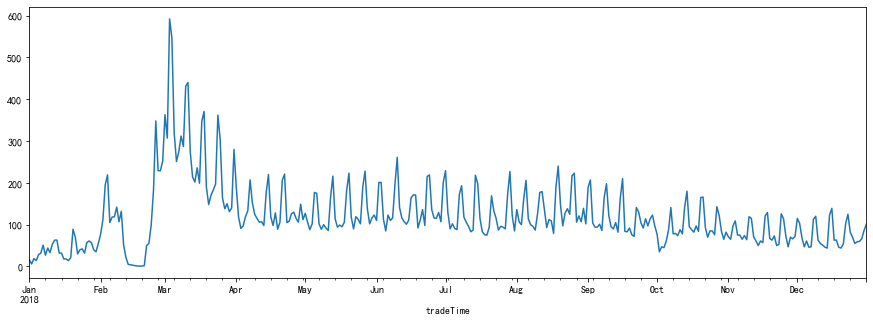

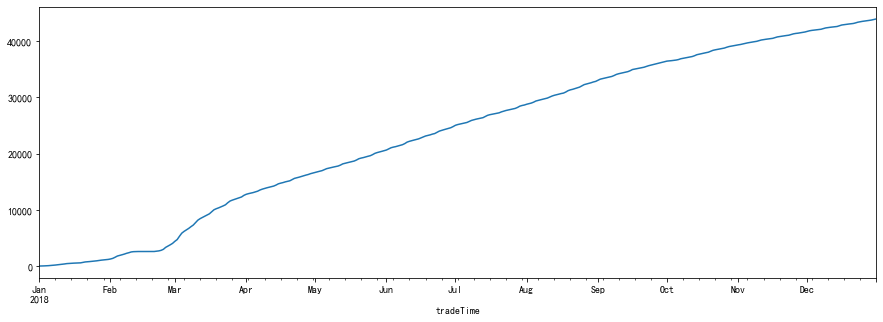

In [63]:
# 对成交量的分析
# 历史成交趋势
data_train_inc.to_period("D").groupby(data_train_inc.to_period("D").index)["ID"].count().plot(figsize=(15, 5))
plt.show()
# 历史成交（累计）趋势
data_train_inc.to_period("D").groupby(data_train_inc.to_period("D").index)["ID"].count().cumsum().plot(figsize=(15, 5))
plt.show()

- 可以发现成交趋势在三月份的时候开始增长，并在三月份有比较大的一个成交量
- 四月份后基本上处于一个平稳的成交阶段

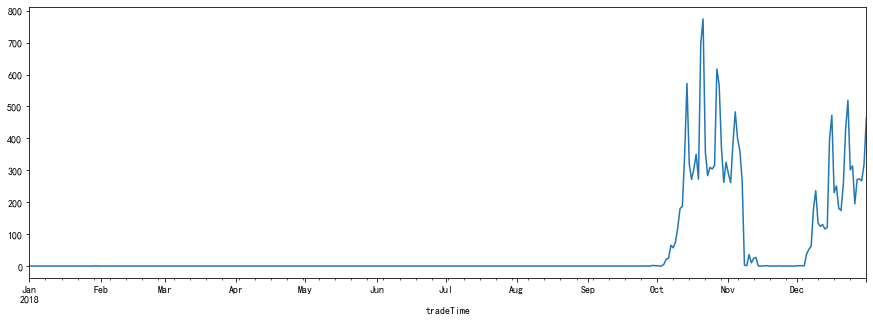

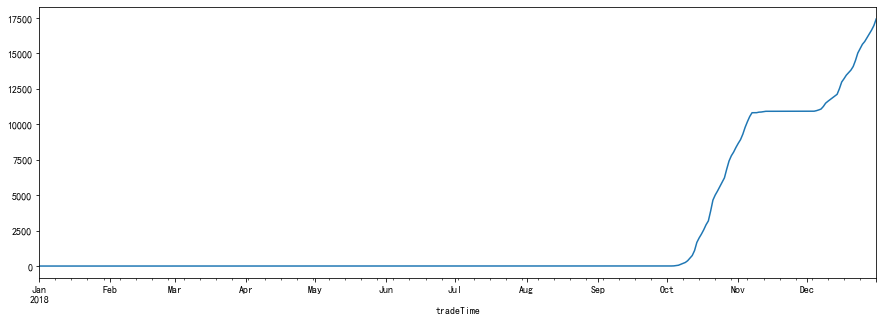

In [64]:
# 对带看次数的分析
data_train_inc.to_period("D").groupby(data_train_inc.to_period("D").index)["lookNum"].sum().plot(figsize=(15, 5))
plt.show()
# 对带看次数的分析(累计)
data_train_inc.to_period("D").groupby(data_train_inc.to_period("D").index)["lookNum"].sum().cumsum().plot(figsize=(15, 5))
plt.show()

- 带看次数从一定程度反映了当下市场的需求
- 可以看到10月和12月带看量有较大的增长

In [12]:

#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

# 使用时间排序之后的df分析在时间维度是否有单调特征
fea_cols = [col for col in data_train_inc.columns]
for col in fea_cols:
    cnt = incresing(data_train_inc[col].values)
    if cnt / data_train_inc.shape[0] >= 0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train_inc.shape[0])

### 简要分析
先编写判断单调的函数 *incresing*， 然后再应用到每列上；  
单调特征是 tradeTime，为时间列。  
  
多说句额外的，时间列在特征工程的时候，不同的情况下能有很多的变种形式，比如按年月日分箱，或者按不同的维度在时间上聚合分组，等等  

## 7. 特征nunique分布

In [13]:
# 查看离散特征的特征量
data_all[categorical_feas].nunique()

rentType              4
houseType           107
houseFloor            3
region               15
plate                66
houseToward          10
houseDecoration       4
communityName      4236
plate                66
buildYear            80
dtype: int64

In [14]:
# 去掉特征数量较多的离散变量
categorical_feas_hist = []
for c in categorical_feas:
    if c not in ["communityName", "tradeTime"]:
        categorical_feas_hist.append(c)
categorical_feas_hist

['rentType',
 'houseType',
 'houseFloor',
 'region',
 'plate',
 'houseToward',
 'houseDecoration',
 'plate',
 'buildYear']

rentType的特征数量为 4， 特征分布如下：
未知方式    32944
整租       5736
合租       5224
--          5
Name: rentType, dtype: int64


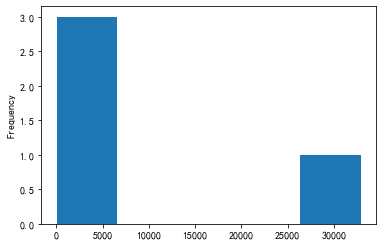

houseType的特征数量为 107， 特征分布如下：
1室1厅1卫    10382
2室1厅1卫     9153
2室2厅1卫     7269
3室1厅1卫     4091
3室2厅2卫     2951
3室2厅1卫     2050
4室1厅1卫     1971
1室0厅1卫     1365
1室2厅1卫      979
2室2厅2卫      948
2室0厅1卫      461
4室2厅2卫      453
4室2厅3卫      278
5室1厅1卫      200
2室1厅2卫      164
3室2厅3卫      153
3室1厅2卫      144
1室0厅0卫       89
6室1厅1卫       65
4室2厅4卫       62
5室2厅3卫       54
1室1厅2卫       42
4室2厅1卫       40
5室2厅2卫       35
4室3厅3卫       34
4室3厅4卫       34
5室2厅4卫       30
5室3厅3卫       30
4室1厅2卫       23
3室0厅1卫       21
          ...  
6室2厅5卫        1
8室2厅3卫        1
5室5厅4卫        1
7室1厅7卫        1
0室0厅1卫        1
1室2厅0卫        1
6室4厅4卫        1
7室1厅3卫        1
3室4厅4卫        1
3室0厅0卫        1
6室1厅4卫        1
6室4厅5卫        1
9室2厅5卫        1
6室0厅6卫        1
7室4厅3卫        1
8室2厅4卫        1
5室4厅2卫        1
4室0厅2卫        1
3室2厅5卫        1
5室4厅5卫        1
7室3厅4卫        1
9室3厅8卫        1
5室1厅3卫        1
2室1厅3卫        1
4室4厅2卫        1
8室3厅4卫        1
3室1厅0卫        1
6室4厅2卫        1
8室4厅4卫        1
5室1厅5卫     

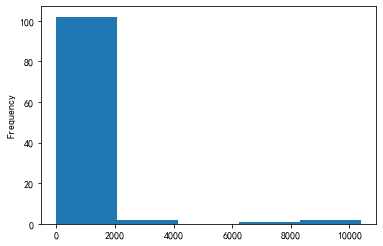

houseFloor的特征数量为 3， 特征分布如下：
中    16389
高    14908
低    12612
Name: houseFloor, dtype: int64


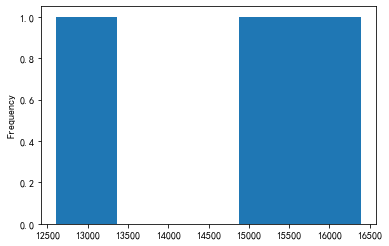

region的特征数量为 15， 特征分布如下：
RG00002    12161
RG00005     6050
RG00003     4364
RG00010     3834
RG00012     3630
RG00004     3486
RG00006     2016
RG00007     1752
RG00008     1336
RG00013     1312
RG00001     1234
RG00014     1155
RG00011      836
RG00009      742
RG00015        1
Name: region, dtype: int64


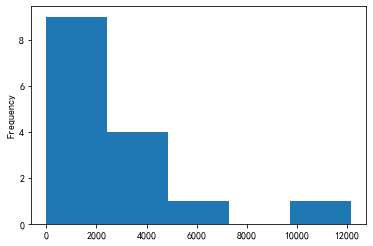

plate的特征数量为 66， 特征分布如下：
BK00031    2013
BK00033    1929
BK00045    1894
BK00055    1665
BK00056    1641
BK00052    1474
BK00054    1370
BK00017    1365
BK00041    1323
BK00051    1307
BK00046    1264
BK00035    1217
BK00042    1181
BK00009    1082
BK00050    1023
BK00043     982
BK00026     956
BK00047     926
BK00034     902
BK00013     891
BK00053     860
BK00028     824
BK00010     715
BK00060     715
BK00040     703
BK00029     688
BK00018     651
BK00062     648
BK00022     645
BK00064     639
           ... 
BK00037     475
BK00012     455
BK00024     433
BK00038     425
BK00020     403
BK00002     388
BK00027     380
BK00039     365
BK00065     363
BK00057     294
BK00063     292
BK00015     271
BK00006     250
BK00007     246
BK00030     240
BK00021     237
BK00066     232
BK00008     223
BK00049     220
BK00004     209
BK00048     175
BK00025     170
BK00023     139
BK00059     130
BK00044     105
BK00016      43
BK00036      34
BK00058      15
BK00032       3
BK00001       1


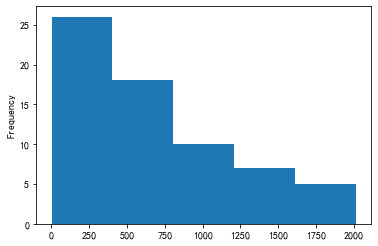

houseToward的特征数量为 10， 特征分布如下：
南       35043
南北       2784
暂无数据     2136
北        2043
东南        658
东         553
西南        323
西         275
西北         70
东西         24
Name: houseToward, dtype: int64


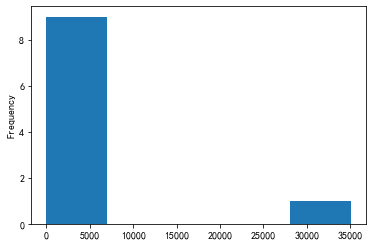

houseDecoration的特征数量为 4， 特征分布如下：
其他    31021
精装    11288
简装     1273
毛坯      327
Name: houseDecoration, dtype: int64


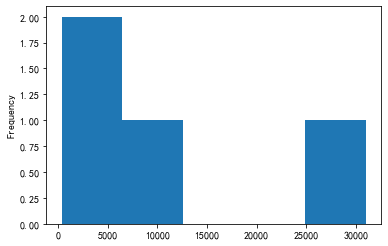

plate的特征数量为 66， 特征分布如下：
BK00031    2013
BK00033    1929
BK00045    1894
BK00055    1665
BK00056    1641
BK00052    1474
BK00054    1370
BK00017    1365
BK00041    1323
BK00051    1307
BK00046    1264
BK00035    1217
BK00042    1181
BK00009    1082
BK00050    1023
BK00043     982
BK00026     956
BK00047     926
BK00034     902
BK00013     891
BK00053     860
BK00028     824
BK00010     715
BK00060     715
BK00040     703
BK00029     688
BK00018     651
BK00062     648
BK00022     645
BK00064     639
           ... 
BK00037     475
BK00012     455
BK00024     433
BK00038     425
BK00020     403
BK00002     388
BK00027     380
BK00039     365
BK00065     363
BK00057     294
BK00063     292
BK00015     271
BK00006     250
BK00007     246
BK00030     240
BK00021     237
BK00066     232
BK00008     223
BK00049     220
BK00004     209
BK00048     175
BK00025     170
BK00023     139
BK00059     130
BK00044     105
BK00016      43
BK00036      34
BK00058      15
BK00032       3
BK00001       1


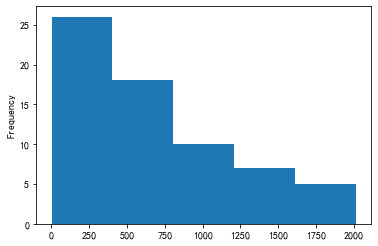

buildYear的特征数量为 80， 特征分布如下：
1994    3029
暂无信息    2936
2006    2106
2007    1932
2008    1931
2005    1915
2010    1847
1995    1818
1993    1634
2011    1568
2004    1510
2009    1329
2014    1303
2003    1242
1997    1217
2002    1192
2012    1119
1996    1070
2000     988
2001     948
1999     897
2015     893
1998     794
2013     765
1987     672
1983     639
1991     580
1984     526
1980     479
1990     456
        ... 
1974      43
1960      36
1930      31
1973      26
1955      21
1932      20
2017      15
1952      14
1936      13
1968      12
1931      12
1965       9
1967       8
1910       6
1937       5
1920       5
1963       4
1940       4
1912       4
1949       4
1959       3
1970       3
1969       3
1972       2
1961       2
1962       2
1939       2
1950       2
1926       2
1951       1
Name: buildYear, Length: 80, dtype: int64


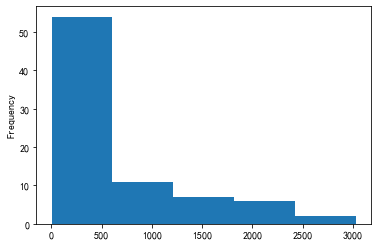

In [22]:
# data_train["houseType"].value_counts().plot.bar()

# 特征nunique分布 特征对应取值数量分布的频数
# 就是有多少特征对应的取值的数量在某个区间 Y轴代表有多少特征，X轴代表这些特征对应的取值的数量
for feature in categorical_feas_hist:
    print("{}的特征数量为 {}， 特征分布如下：".format(feature, data_all[feature].nunique()))
    print(data_all[feature].value_counts())
    data_all[feature].value_counts().plot.hist(bins=5)
    
    plt.show()

rentType的特征数量为 4， 特征分布如下：
未知方式    32944
整租       5736
合租       5224
--          5
Name: rentType, dtype: int64


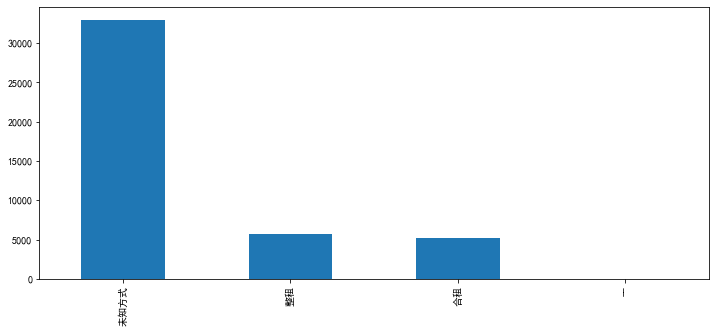

houseType的特征数量为 107， 特征分布如下：
1室1厅1卫    10382
2室1厅1卫     9153
2室2厅1卫     7269
3室1厅1卫     4091
3室2厅2卫     2951
3室2厅1卫     2050
4室1厅1卫     1971
1室0厅1卫     1365
1室2厅1卫      979
2室2厅2卫      948
2室0厅1卫      461
4室2厅2卫      453
4室2厅3卫      278
5室1厅1卫      200
2室1厅2卫      164
3室2厅3卫      153
3室1厅2卫      144
1室0厅0卫       89
6室1厅1卫       65
4室2厅4卫       62
5室2厅3卫       54
1室1厅2卫       42
4室2厅1卫       40
5室2厅2卫       35
4室3厅3卫       34
4室3厅4卫       34
5室2厅4卫       30
5室3厅3卫       30
4室1厅2卫       23
3室0厅1卫       21
          ...  
6室2厅5卫        1
8室2厅3卫        1
5室5厅4卫        1
7室1厅7卫        1
0室0厅1卫        1
1室2厅0卫        1
6室4厅4卫        1
7室1厅3卫        1
3室4厅4卫        1
3室0厅0卫        1
6室1厅4卫        1
6室4厅5卫        1
9室2厅5卫        1
6室0厅6卫        1
7室4厅3卫        1
8室2厅4卫        1
5室4厅2卫        1
4室0厅2卫        1
3室2厅5卫        1
5室4厅5卫        1
7室3厅4卫        1
9室3厅8卫        1
5室1厅3卫        1
2室1厅3卫        1
4室4厅2卫        1
8室3厅4卫        1
3室1厅0卫        1
6室4厅2卫        1
8室4厅4卫        1
5室1厅5卫     

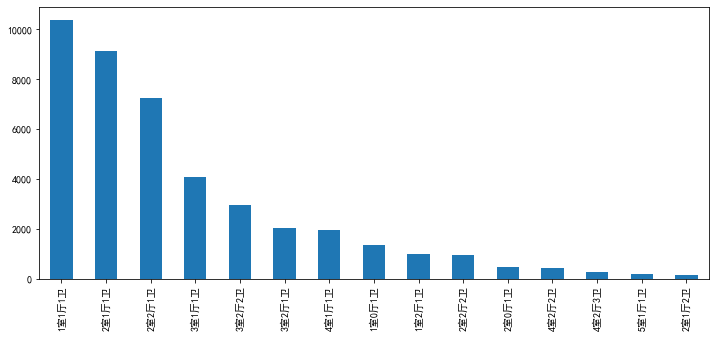

houseFloor的特征数量为 3， 特征分布如下：
中    16389
高    14908
低    12612
Name: houseFloor, dtype: int64


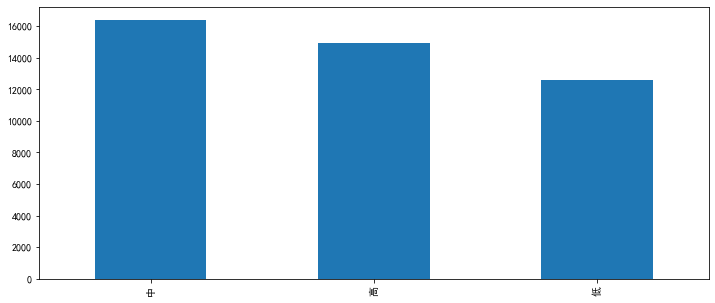

region的特征数量为 15， 特征分布如下：
RG00002    12161
RG00005     6050
RG00003     4364
RG00010     3834
RG00012     3630
RG00004     3486
RG00006     2016
RG00007     1752
RG00008     1336
RG00013     1312
RG00001     1234
RG00014     1155
RG00011      836
RG00009      742
RG00015        1
Name: region, dtype: int64


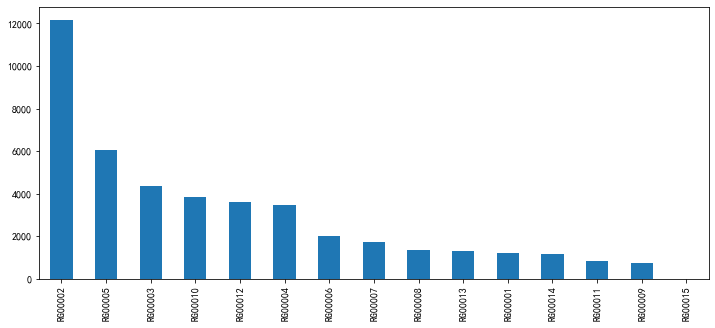

plate的特征数量为 66， 特征分布如下：
BK00031    2013
BK00033    1929
BK00045    1894
BK00055    1665
BK00056    1641
BK00052    1474
BK00054    1370
BK00017    1365
BK00041    1323
BK00051    1307
BK00046    1264
BK00035    1217
BK00042    1181
BK00009    1082
BK00050    1023
BK00043     982
BK00026     956
BK00047     926
BK00034     902
BK00013     891
BK00053     860
BK00028     824
BK00010     715
BK00060     715
BK00040     703
BK00029     688
BK00018     651
BK00062     648
BK00022     645
BK00064     639
           ... 
BK00037     475
BK00012     455
BK00024     433
BK00038     425
BK00020     403
BK00002     388
BK00027     380
BK00039     365
BK00065     363
BK00057     294
BK00063     292
BK00015     271
BK00006     250
BK00007     246
BK00030     240
BK00021     237
BK00066     232
BK00008     223
BK00049     220
BK00004     209
BK00048     175
BK00025     170
BK00023     139
BK00059     130
BK00044     105
BK00016      43
BK00036      34
BK00058      15
BK00032       3
BK00001       1


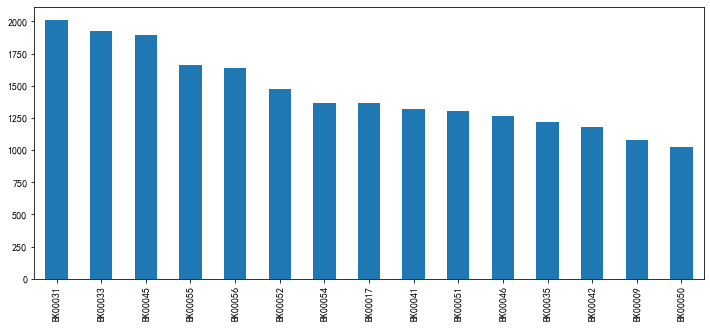

houseToward的特征数量为 10， 特征分布如下：
南       35043
南北       2784
暂无数据     2136
北        2043
东南        658
东         553
西南        323
西         275
西北         70
东西         24
Name: houseToward, dtype: int64


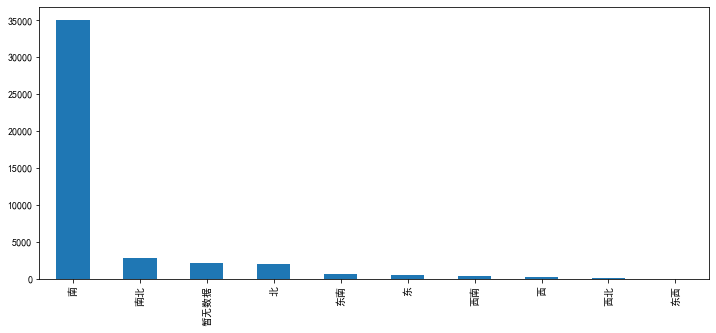

houseDecoration的特征数量为 4， 特征分布如下：
其他    31021
精装    11288
简装     1273
毛坯      327
Name: houseDecoration, dtype: int64


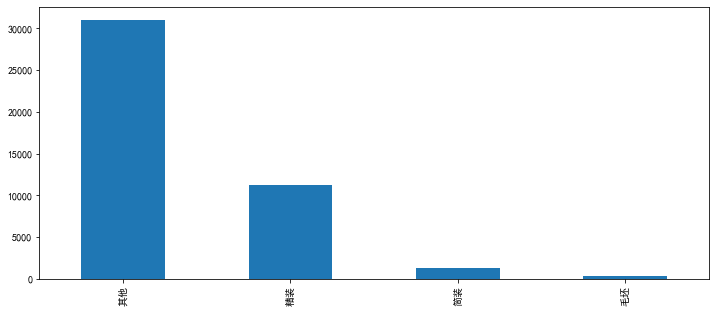

plate的特征数量为 66， 特征分布如下：
BK00031    2013
BK00033    1929
BK00045    1894
BK00055    1665
BK00056    1641
BK00052    1474
BK00054    1370
BK00017    1365
BK00041    1323
BK00051    1307
BK00046    1264
BK00035    1217
BK00042    1181
BK00009    1082
BK00050    1023
BK00043     982
BK00026     956
BK00047     926
BK00034     902
BK00013     891
BK00053     860
BK00028     824
BK00010     715
BK00060     715
BK00040     703
BK00029     688
BK00018     651
BK00062     648
BK00022     645
BK00064     639
           ... 
BK00037     475
BK00012     455
BK00024     433
BK00038     425
BK00020     403
BK00002     388
BK00027     380
BK00039     365
BK00065     363
BK00057     294
BK00063     292
BK00015     271
BK00006     250
BK00007     246
BK00030     240
BK00021     237
BK00066     232
BK00008     223
BK00049     220
BK00004     209
BK00048     175
BK00025     170
BK00023     139
BK00059     130
BK00044     105
BK00016      43
BK00036      34
BK00058      15
BK00032       3
BK00001       1


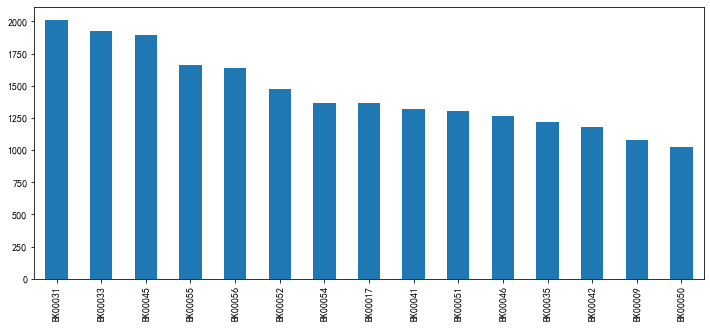

buildYear的特征数量为 80， 特征分布如下：
1994    3029
暂无信息    2936
2006    2106
2007    1932
2008    1931
2005    1915
2010    1847
1995    1818
1993    1634
2011    1568
2004    1510
2009    1329
2014    1303
2003    1242
1997    1217
2002    1192
2012    1119
1996    1070
2000     988
2001     948
1999     897
2015     893
1998     794
2013     765
1987     672
1983     639
1991     580
1984     526
1980     479
1990     456
        ... 
1974      43
1960      36
1930      31
1973      26
1955      21
1932      20
2017      15
1952      14
1936      13
1968      12
1931      12
1965       9
1967       8
1910       6
1937       5
1920       5
1963       4
1940       4
1912       4
1949       4
1959       3
1970       3
1969       3
1972       2
1961       2
1962       2
1939       2
1950       2
1926       2
1951       1
Name: buildYear, Length: 80, dtype: int64


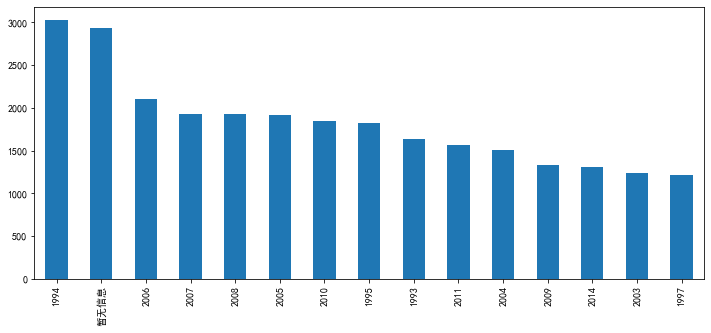

In [23]:
# 特征对应取值的数量，只展示前15个
for feature in categorical_feas_hist:
    print("{}的特征数量为 {}， 特征分布如下：".format(feature, data_all[feature].nunique()))
    print(data_all[feature].value_counts())
    data_all[feature].value_counts()[:15].plot.bar(figsize=(12, 5))
    plt.show()

In [25]:
# 查看小区名称的特征分布，这里是用代号表示
print(data_all['communityName'].value_counts())

XQ01834    359
XQ01274    193
XQ02273    189
XQ03110    186
XQ02337    174
XQ01389    167
XQ01658    164
XQ02789    153
XQ01561    152
XQ00530    152
XQ01339    133
XQ01873    123
XQ00826    123
XQ02296    122
XQ01232    120
XQ01401    119
XQ02441    118
XQ00196    116
XQ02365    110
XQ01207    110
XQ01410    109
XQ00852    106
XQ01672    104
XQ02072    104
XQ01634    100
XQ01375    100
XQ01642    100
XQ01970     97
XQ00210     94
XQ01413     93
          ... 
XQ02568      1
XQ03756      1
XQ01833      1
XQ04101      1
XQ00869      1
XQ03548      1
XQ02938      1
XQ01979      1
XQ01512      1
XQ04034      1
XQ03818      1
XQ03856      1
XQ00912      1
XQ00314      1
XQ03733      1
XQ00453      1
XQ00451      1
XQ02811      1
XQ00770      1
XQ02917      1
XQ02472      1
XQ03948      1
XQ02662      1
XQ02359      1
XQ03544      1
XQ01962      1
XQ01703      1
XQ02496      1
XQ02628      1
XQ02220      1
Name: communityName, Length: 4236, dtype: int64


### 简要分析
用自带函数value_counts() 来得到每个分类变量的 种类 分布；  
并且简单画出柱状图。  
  
rentType：4种，且绝大多数是无用的未知方式；  
houseType：104种，绝大多数在3室及以下；  
houseFloor：3种，分布较为均匀；  
region：       15种；  
plate：        66种；  
houseToward：    10种；  
houseDecoration： 4种，一大半是其他；  
buildYear：     80种；  
communityName：   4236种，且分布较为稀疏；  
  
此步骤是为之后数据处理和特征工程做准备，先理解每个字段的含义以及分布，之后需要根据实际含义对分类变量做不同的处理。  

## 8. 统计特征值频次大于100的特征

In [26]:
# 统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_all[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

    Type  counts
0  Train   41440
1   Test    2469
   buildYear  counts
0       1994    3029
1       暂无信息    2936
2       2006    2106
3       2007    1932
4       2008    1931
5       2005    1915
6       2010    1847
7       1995    1818
8       1993    1634
9       2011    1568
10      2004    1510
11      2009    1329
12      2014    1303
13      2003    1242
14      1997    1217
15      2002    1192
16      2012    1119
17      1996    1070
18      2000     988
19      2001     948
20      1999     897
21      2015     893
22      1998     794
23      2013     765
24      1987     672
25      1983     639
26      1991     580
27      1984     526
28      1980     479
29      1990     456
30      1988     448
31      1989     440
32      1985     390
33      1982     368
34      1986     344
35      1992     330
36      1976     258
37      1957     238
38      1981     237
39      1977     163
40      1956     158
41      2016     152
42      1978     142
43      1958     133
44  

### 简要分析
此步骤和特征nunique分布结合步骤结合起来看，有一些小于100的是可以直接统一归类为其他的

## 9. Label分布

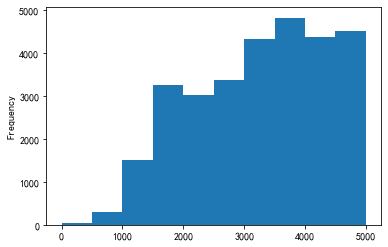

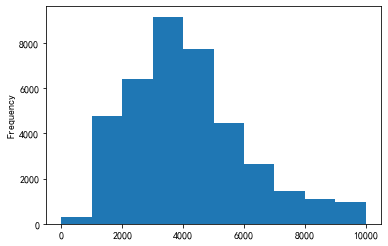

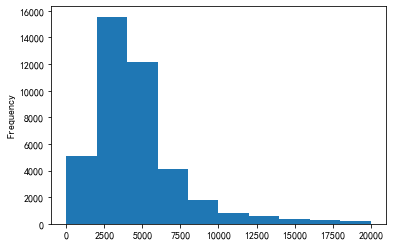

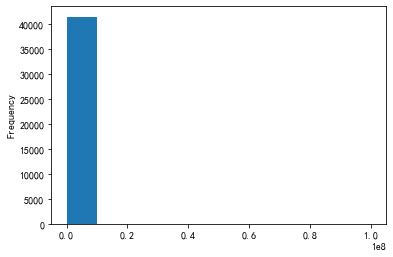

In [65]:
# 分别对 5000以内 10000以内 20000以内的房租进行探索
data_train[data_train['tradeMoney']<=5000]["tradeMoney"].plot.hist()
plt.show()
data_train[data_train['tradeMoney']<=10000]["tradeMoney"].plot.hist()
plt.show()
data_train[data_train['tradeMoney']<=20000]["tradeMoney"].plot.hist()
plt.show()
data_train["tradeMoney"].plot.hist()
plt.show()

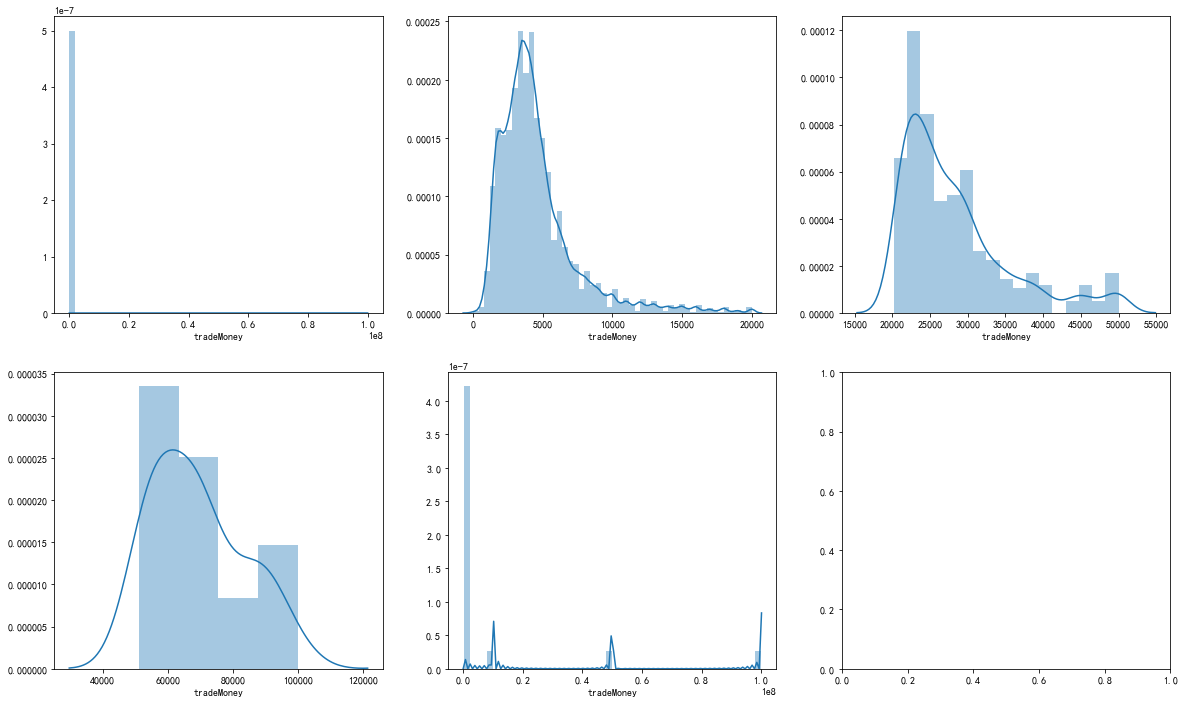

In [19]:
# Label 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [30]:
# 细化统计
print("money<=3000",len(data_train[(data_train['tradeMoney']<=3000)]['tradeMoney']))
print("3000<money<=5000",len(data_train[(data_train['tradeMoney']>3000)&(data_train['tradeMoney']<=5000)]['tradeMoney']))
print("5000<money<=10000",len(data_train[(data_train['tradeMoney']>5000)&(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=3000 12702
3000<money<=5000 16826
5000<money<=10000 9436
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


- 1000~6000的房租水平占比很大
- 也有少数超过20000房租的

### 简要分析
将目标变量tradeMoney分组，并查看每组间的分布；  
可以看出绝大多数都是集中在10000元以内的，并且从图中可以看到该分布是右偏的。  
  
这里只是一种实现方式，完全可以将tradeMoney和其他字段一起结合起来查看，比如楼层高低，地区板块。  

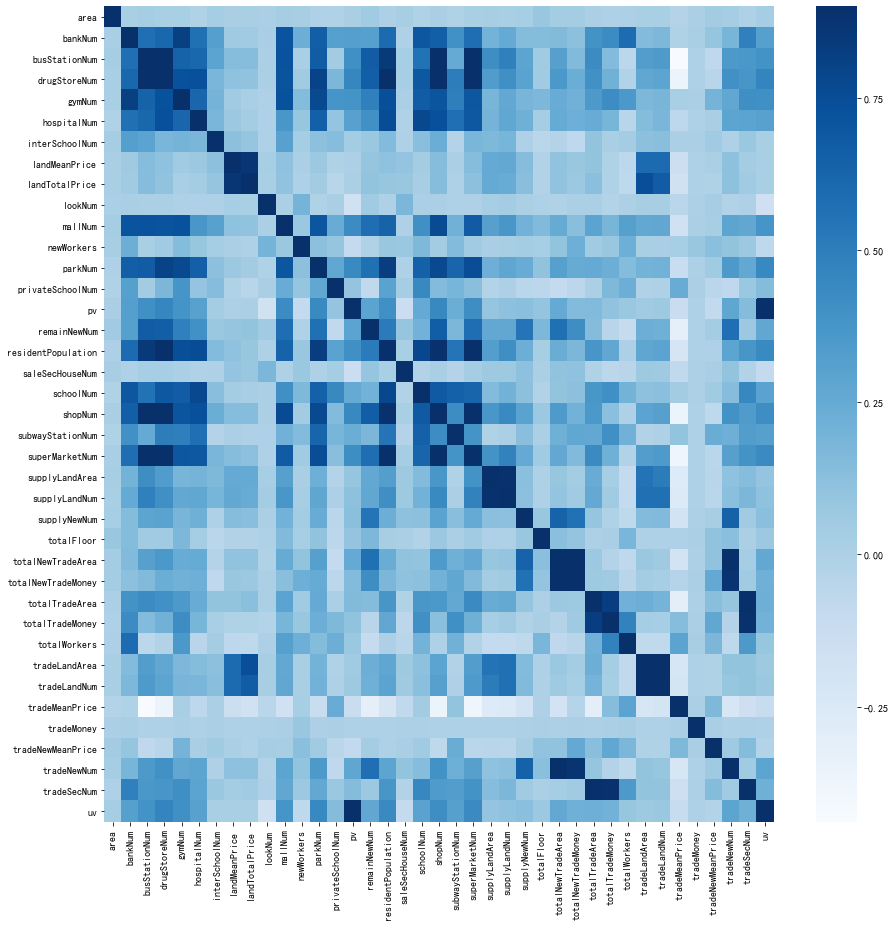

In [75]:
numerical_feas_for_hot = []
for i in numerical_feas:
    if i not in ["ID"]:
        numerical_feas_for_hot.append(i)

corr = data_train[numerical_feas_for_hot].corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, vmax=0.9, cmap="Blues",
            xticklabels=True, yticklabels=True)  # square=True,